In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("forestfires.csv")

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df=df.iloc[:,[30,6,7,8,9]]

In [5]:
df

,size_category,temp,RH,wind,rain
0,small,8.2,51,6.7,0.0
1,small,18.0,33,0.9,0.0
2,small,14.6,33,1.3,0.0
3,small,8.3,97,4.0,0.2
4,small,11.4,99,1.8,0.0
...,...,...,...,...,...
512,large,27.8,32,2.7,0.0
513,large,21.9,71,5.8,0.0
514,large,21.2,70,6.7,0.0
515,small,25.6,42,4.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


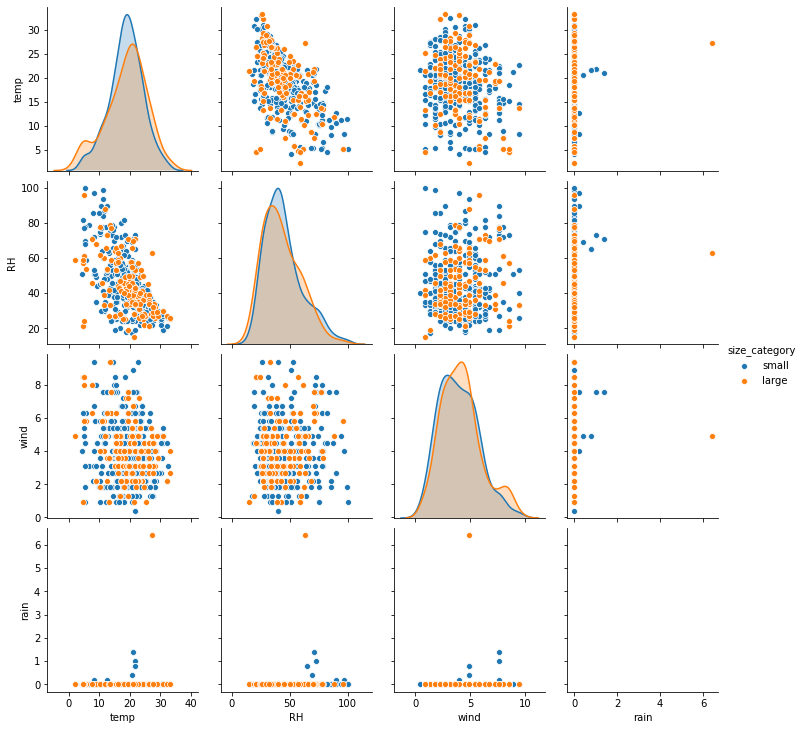

In [6]:
sns.pairplot(df,hue='size_category')

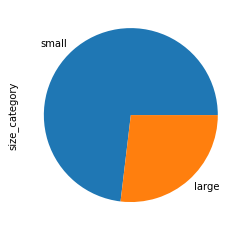

small    378
large    139
Name: size_category, dtype: int64


In [7]:
df['size_category'].value_counts().plot.pie()
plt.show()
print(df['size_category'].value_counts())

In [8]:
#Checking for null values
df.isnull().sum()

size_category    0
temp             0
RH               0
wind             0
rain             0
dtype: int64

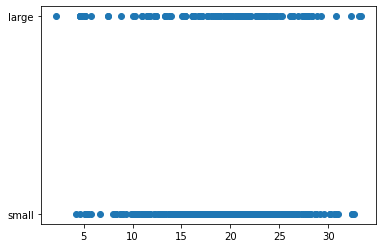

In [9]:
plt.scatter(df.temp, df.size_category)
plt.show()

In [10]:
df.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663
std,5.806625,16.317469,1.791653,0.295959
min,2.200000,15.000000,0.400000,0.000000
25%,15.500000,33.000000,2.700000,0.000000
50%,19.300000,42.000000,4.000000,0.000000
75%,22.800000,53.000000,4.900000,0.000000
max,33.300000,100.000000,9.400000,6.400000


In [11]:
x=df.iloc[:,1:5]

In [12]:
x

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
...,...,...,...,...
512,27.8,32,2.7,0.0
513,21.9,71,5.8,0.0
514,21.2,70,6.7,0.0
515,25.6,42,4.0,0.0


In [13]:
y=df.iloc[:,0]
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [15]:
from sklearn.preprocessing import scale

In [16]:
x_train=scale(x_train)
x_test=scale(x_test)

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
model=MLPClassifier(hidden_layer_sizes=(100,))
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,y_pred)

0.7243589743589743

In [20]:
confusion_matrix(y_test,y_pred)

array([[  2,  40],
       [  3, 111]], dtype=int64)

In [22]:
classification_report = classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

       large       0.40      0.05      0.09        42
       small       0.74      0.97      0.84       114

    accuracy                           0.72       156
   macro avg       0.57      0.51      0.46       156
weighted avg       0.64      0.72      0.64       156

